## TASK 02
## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('TASK 02.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## DATA CLEANING

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [7]:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [8]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [9]:
data.drop('Cabin', axis=1, inplace=True)

In [10]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

male      266
female    152
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


## EDA

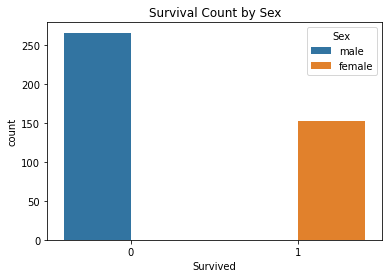

In [13]:
# Explore survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Sex')
plt.show()

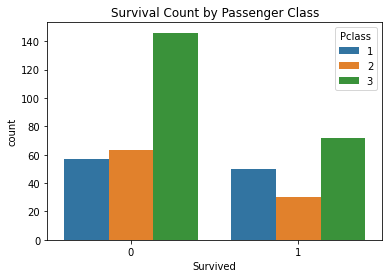

In [14]:
# Explore survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

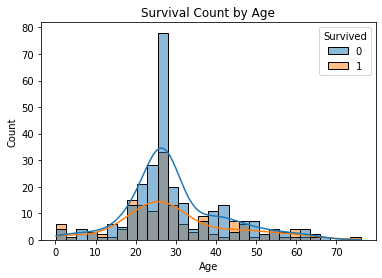

In [15]:
# Explore survival rate by age
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Survival Count by Age')
plt.show()


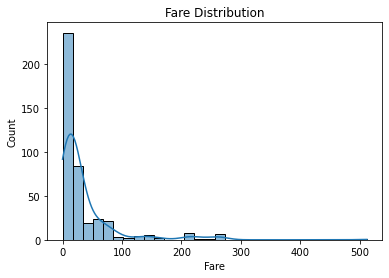

In [16]:
# Explore fare distribution
sns.histplot(data=data, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

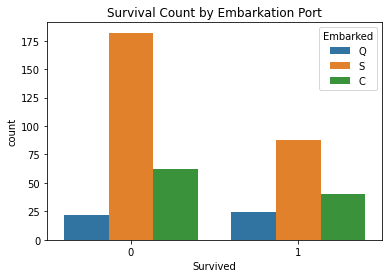

In [17]:
# Explore survival rate by embarkation port
sns.countplot(x='Survived', hue='Embarked', data=data)
plt.title('Survival Count by Embarkation Port')
plt.show()

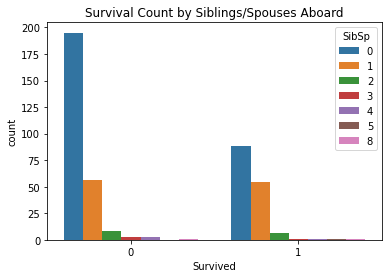

In [18]:
# Explore survival rate by number of siblings/spouses aboard
sns.countplot(x='Survived', hue='SibSp', data=data)
plt.title('Survival Count by Siblings/Spouses Aboard')
plt.show()

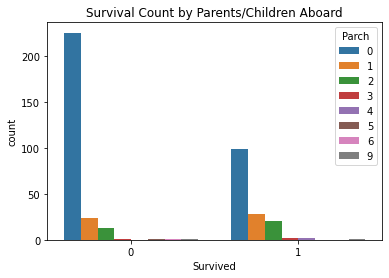

In [19]:
# Explore survival rate by number of parents/children aboard
sns.countplot(x='Survived', hue='Parch', data=data)
plt.title('Survival Count by Parents/Children Aboard')
plt.show()

These visualizations help us identify relationships between variables and understand patterns and trends in the Titanic dataset despite the missing and inappropriate values.

## IDENTIFYING THE RELATIONSHIP BETWEEN VARIABLES 

In [20]:
# Summary statistics for numerical features
print(data.describe())

# Summary statistics for categorical features
print(data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.576535  
std      0.981429   55.850103  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.471875  
max      9.000000  512.329200  
                        Name   Sex    Ticket Embarked
count                    41

#### a. Univariate Analysis

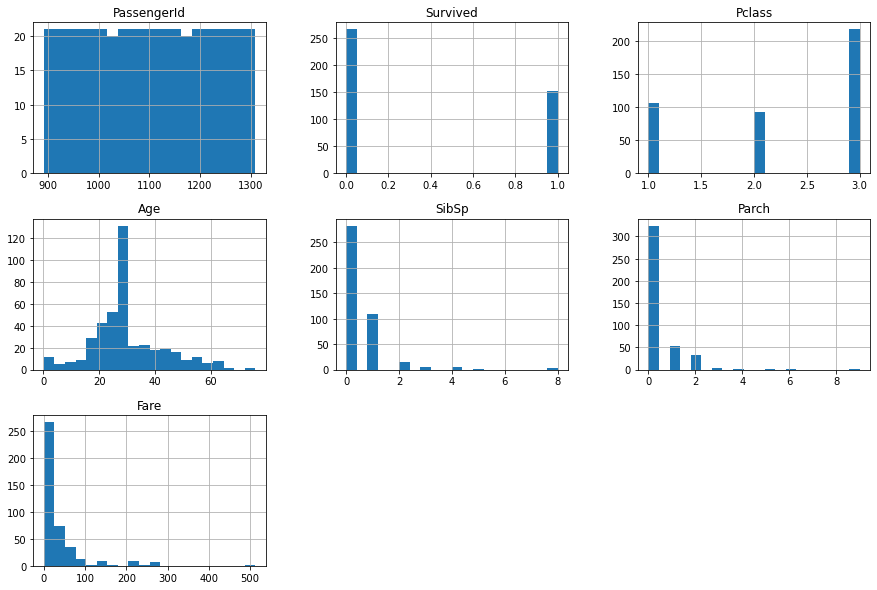

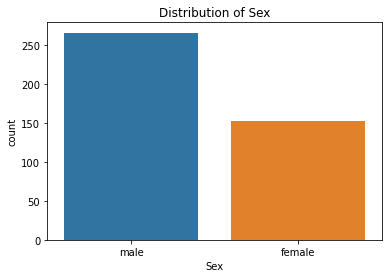

In [22]:
# Histograms for continuous variables
data.hist(bins=20, figsize=(15,10))
plt.show()

# Bar charts for categorical variables
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Sex')
plt.show()

#### b. Bivariate Analysis

Exploring the relationship between pairs of variables, focusing especially on the relationship with the target variable 'Survived'.

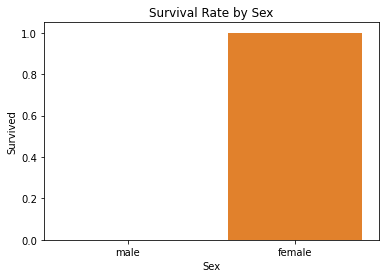

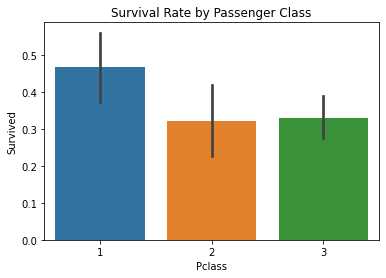

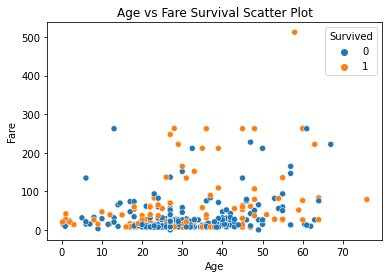

In [23]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Scatter plot Age vs. Fare colored by Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs Fare Survival Scatter Plot')
plt.show()

#### c. Multivariate Analysis

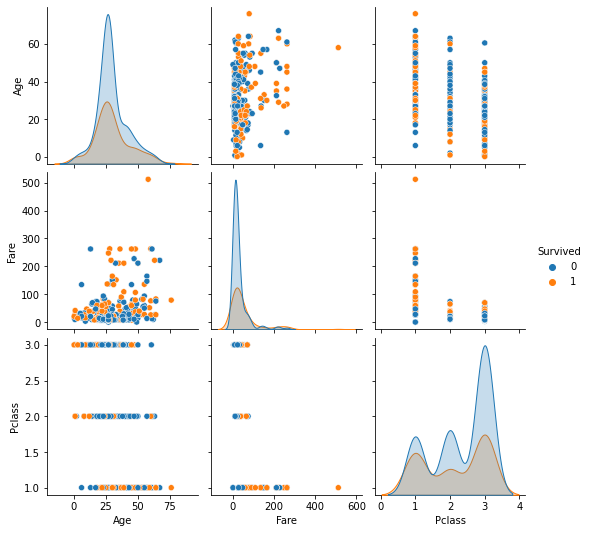

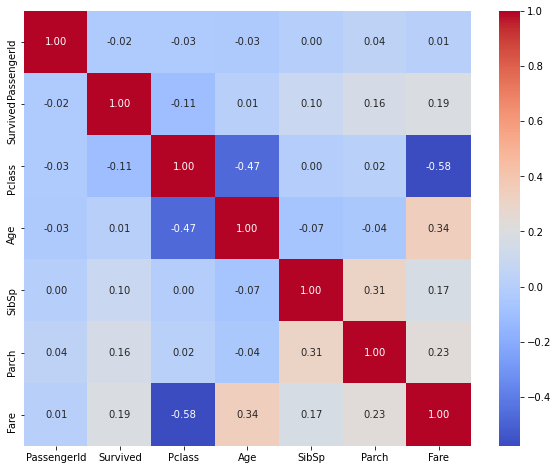

In [24]:
# Pairplot for multiple variable interactions
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()